In [69]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [70]:
data = pd.read_csv('cleaned_classifications.csv')

In [71]:
data.head

<bound method NDFrame.head of        Unnamed: 0  classification_id                            username  \
0               0           30380376  not-logged-in-3dfa3cd88ac5a4508e6c   
1               0           30381722  not-logged-in-3dfa3cd88ac5a4508e6c   
2               0           30381722  not-logged-in-3dfa3cd88ac5a4508e6c   
3               0           30381722  not-logged-in-3dfa3cd88ac5a4508e6c   
4               0           30381722  not-logged-in-3dfa3cd88ac5a4508e6c   
5               0           30381722  not-logged-in-3dfa3cd88ac5a4508e6c   
6               0           30408630  not-logged-in-3dfa3cd88ac5a4508e6c   
7               0           31074072  not-logged-in-3dfa3cd88ac5a4508e6c   
8               0           31175443  not-logged-in-3dfa3cd88ac5a4508e6c   
9               0           31175443  not-logged-in-3dfa3cd88ac5a4508e6c   
10              0           31175443  not-logged-in-3dfa3cd88ac5a4508e6c   
11              0           31184143  not-logged-in-3dfa3c

In [72]:
data

,Unnamed: 0,classification_id,username,created_at,subject_data,subject_id,angle,intersection_point_x,intersection_point_y,major_axis_length,major_x1,major_y1,major_x2,major_y2,minor_axis_length,minor_x1,minor_y1,minor_x2,minor_y2
0,0,30380376,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:03:13 UTC,"{""6262372"":{""retired"":null,""latitude"":""-37.553...",6262372,89.500802,587.673267,304.606337,138.621788,636.000000,351.00000,536.000000,255.000000,72.862885,559.000000,335.000000,609.000000,282.000000
1,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,88.157423,342.502181,232.219193,132.849539,336.000000,175.00000,351.000000,307.000000,82.873397,385.000000,226.000000,303.000000,238.000000
2,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,84.788615,429.580565,89.776407,138.090550,432.000000,23.00000,427.000000,161.000000,73.109507,389.000000,92.000000,462.000000,88.000000
3,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,89.477009,652.504844,141.824516,142.835570,714.000000,101.00000,595.000000,180.000000,75.166482,637.000000,118.000000,678.000000,181.000000
4,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.260928,492.274611,414.823834,122.482652,430.000000,430.00000,549.000000,401.000000,60.083276,486.000000,396.000000,505.000000,453.000000
5,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,87.098180,194.403276,423.730172,155.544206,200.000000,357.00000,187.000000,512.000000,74.672619,152.000000,418.000000,226.000000,428.000000
6,0,30408630,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 17:02:24 UTC,"{""6262363"":{""retired"":null,""latitude"":""-29.267...",6262363,88.788487,267.942598,370.824773,186.868938,213.000000,431.00000,339.000000,293.000000,74.411021,259.000000,363.000000,315.000000,412.000000
7,0,31074072,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-02 15:30:05 UTC,"{""6262343"":{""retired"":null,""latitude"":""-55.032...",6262343,80.430317,484.220478,113.761623,224.875521,574.000000,82.00000,362.000000,157.000000,104.560987,475.000000,61.000000,493.000000,164.000000
8,0,31175443,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-02 21:03:36 UTC,"{""6262371"":{""retired"":null,""latitude"":""-37.553...",6262371,89.682307,609.811475,167.266393,146.931957,640.000000,97.00000,582.000000,232.000000,84.693565,569.000000,150.000000,647.000000,183.000000
9,0,31175443,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-02 21:03:36 UTC,"{""6262371"":{""retired"":null,""latitude"":""-37.553...",6262371,88.488874,447.582464,239.090267,165.196852,488.000000,148.00000,421.000000,299.000000,86.539009,411.000000,224.000000,491.000000,257.000000


In [73]:
#supervised learning- use existing data's patterns to predict label associated with previously unforeseen data
#unsupervised learning - set of vectors, no labels. algorithm discovers previously undiscovered patterns


Estimated number of clusters: 3
Estimated numer of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


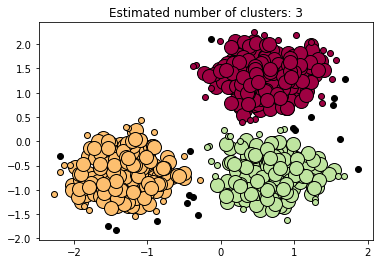

In [74]:
#test using DBSCAN - density-based spatial clustering of applications with noise
#good for data with relatively uniform clustering patterns


#sample data sklearn.cluster.DBSCAN()
centers = [1,1], [-1,-1], [1,-1]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
#makeblobs - generates isotropic Gaussian blobs for clustering

X=StandardScaler().fit_transform(X)

#compute DBSCAN
db=DBSCAN(eps=0.3, min_samples=10).fit(X)
#fit method estimates the best representative funciton for the data points
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


#Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated numer of noise points: %d' % n_noise_) 
print('Homogeneity: %0.3f' % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1: 
        col = [0,0,0,1]
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



In [75]:
test1 = data.loc[data['subject_id']==6262362]

In [76]:
newdf = pd.DataFrame(test1)
newdf

,Unnamed: 0,classification_id,username,created_at,subject_data,subject_id,angle,intersection_point_x,intersection_point_y,major_axis_length,major_x1,major_y1,major_x2,major_y2,minor_axis_length,minor_x1,minor_y1,minor_x2,minor_y2
1,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,88.157423,342.502181,232.219193,132.849539,336.0,175.0,351.0,307.0,82.873397,385.0,226.0,303.0,238.0
2,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,84.788615,429.580565,89.776407,138.090550,432.0,23.0,427.0,161.0,73.109507,389.0,92.0,462.0,88.0
3,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,89.477009,652.504844,141.824516,142.835570,714.0,101.0,595.0,180.0,75.166482,637.0,118.0,678.0,181.0
4,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.260928,492.274611,414.823834,122.482652,430.0,430.0,549.0,401.0,60.083276,486.0,396.0,505.0,453.0
5,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,87.098180,194.403276,423.730172,155.544206,200.0,357.0,187.0,512.0,74.672619,152.0,418.0,226.0,428.0
20,0,31415272,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 19:21:54 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,88.868633,341.335727,216.021544,117.720007,337.0,177.0,350.0,294.0,61.522354,311.0,220.0,372.0,212.0
21,0,31415272,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 19:21:54 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,86.730049,279.381950,330.628139,125.015999,280.0,292.0,278.0,417.0,73.061618,246.0,332.0,319.0,329.0
22,0,31415272,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 19:21:54 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,87.924974,193.731884,402.000000,138.090550,195.0,367.0,190.0,505.0,57.000000,168.0,402.0,225.0,402.0
31,0,31429201,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 20:14:44 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.095699,192.583463,444.354155,160.003125,192.0,351.0,193.0,511.0,76.321688,153.0,448.0,229.0,441.0
32,0,31429201,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 20:14:44 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.389581,285.843727,358.694966,118.270876,282.0,302.0,290.0,420.0,67.742158,257.0,363.0,324.0,353.0


In [77]:
#np.dstack might be better here.
newdf['coordinate_column'] = list(zip(test1.intersection_point_x, test1.intersection_point_y))
    

In [78]:
newdf

,Unnamed: 0,classification_id,username,created_at,subject_data,subject_id,angle,intersection_point_x,intersection_point_y,major_axis_length,major_x1,major_y1,major_x2,major_y2,minor_axis_length,minor_x1,minor_y1,minor_x2,minor_y2,coordinate_column
1,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,88.157423,342.502181,232.219193,132.849539,336.0,175.0,351.0,307.0,82.873397,385.0,226.0,303.0,238.0,"(342.50218103, 232.21919302)"
2,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,84.788615,429.580565,89.776407,138.090550,432.0,23.0,427.0,161.0,73.109507,389.0,92.0,462.0,88.0,"(429.58056495, 89.7764074)"
3,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,89.477009,652.504844,141.824516,142.835570,714.0,101.0,595.0,180.0,75.166482,637.0,118.0,678.0,181.0,"(652.50484352, 141.82451565)"
4,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.260928,492.274611,414.823834,122.482652,430.0,430.0,549.0,401.0,60.083276,486.0,396.0,505.0,453.0,"(492.2746114, 414.82383419999996)"
5,0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,87.098180,194.403276,423.730172,155.544206,200.0,357.0,187.0,512.0,74.672619,152.0,418.0,226.0,428.0,"(194.40327586, 423.73017241)"
20,0,31415272,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 19:21:54 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,88.868633,341.335727,216.021544,117.720007,337.0,177.0,350.0,294.0,61.522354,311.0,220.0,372.0,212.0,"(341.33572711, 216.02154399)"
21,0,31415272,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 19:21:54 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,86.730049,279.381950,330.628139,125.015999,280.0,292.0,278.0,417.0,73.061618,246.0,332.0,319.0,329.0,"(279.38194978, 330.62813905)"
22,0,31415272,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 19:21:54 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,87.924974,193.731884,402.000000,138.090550,195.0,367.0,190.0,505.0,57.000000,168.0,402.0,225.0,402.0,"(193.73188406, 402.0)"
31,0,31429201,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 20:14:44 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.095699,192.583463,444.354155,160.003125,192.0,351.0,193.0,511.0,76.321688,153.0,448.0,229.0,441.0,"(192.58346347, 444.35415468)"
32,0,31429201,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-03 20:14:44 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.389581,285.843727,358.694966,118.270876,282.0,302.0,290.0,420.0,67.742158,257.0,363.0,324.0,353.0,"(285.84372652, 358.69496619)"


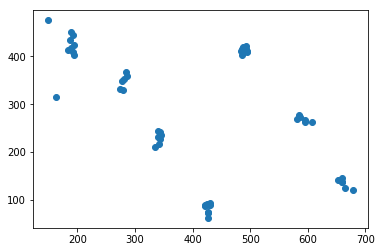

In [89]:
#create learning dataset (is five points enough?)
coordinate_list = []
for column in newdf.coordinate_column:
    coordinate_list.append(column)

coordinate_list 
zip(*coordinate_list)
plt.scatter(*zip(*coordinate_list))

Estimated number of clusters: 7
Estimated number of noise points: 1


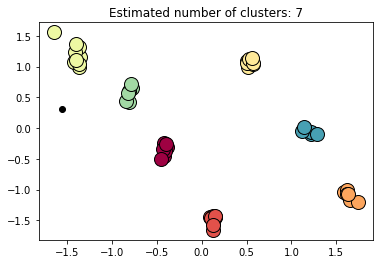

In [100]:
Z = StandardScaler().fit_transform(coordinate_list)

mydb = DBSCAN().fit(Z)
core_samples_mask = np.zeros_like(mydb.labels_, dtype=bool)
core_samples_mask[mydb.core_sample_indices_] = True
labels = mydb.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


7